In [1]:
import numpy as np
import keras
from keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt

2024-10-18 20:35:45.131410: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-18 20:35:45.131447: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-18 20:35:45.132697: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-18 20:35:45.139594: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-18 20:35:45.957749: W tensorflow/compiler/tf2

In [2]:
(x_train,y_train) , (x_test,y_test) = keras.datasets.mnist.load_data()
(x_train,x_test) = (x_train.astype("float32") / 255,x_test.astype("float32") / 255)
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
print(len(x_train),len(x_test))

60000 10000


In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=x_train[0].shape),
        layers.Conv2D(32,kernel_size=(3,3),activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10,activation="softmax"),
    ]
)

2024-10-18 20:35:54.597676: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-18 20:35:54.643272: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-18 20:35:54.643694: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [5]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [6]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [7]:
model.fit(x_train,y_train,batch_size=128,epochs=15,validation_split=0.1)

Epoch 1/15


2024-10-18 20:36:07.344624: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-10-18 20:36:08.790489: I external/local_xla/xla/service/service.cc:168] XLA service 0x7bb8f842c3e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-10-18 20:36:08.790515: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1060, Compute Capability 6.1
2024-10-18 20:36:08.797129: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1729280168.906714    4979 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


422/422 [==============================] - 6s 6ms/step - loss: 0.3685 - accuracy: 0.8891 - val_loss: 0.0841 - val_accuracy: 0.9768
Epoch 2/15
422/422 [==============================] - 2s 5ms/step - loss: 0.1157 - accuracy: 0.9643 - val_loss: 0.0579 - val_accuracy: 0.9853
Epoch 3/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0876 - accuracy: 0.9736 - val_loss: 0.0506 - val_accuracy: 0.9860
Epoch 4/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0718 - accuracy: 0.9771 - val_loss: 0.0400 - val_accuracy: 0.9895
Epoch 5/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0641 - accuracy: 0.9796 - val_loss: 0.0388 - val_accuracy: 0.9895
Epoch 6/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0585 - accuracy: 0.9813 - val_loss: 0.0374 - val_accuracy: 0.9892
Epoch 7/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0521 - accuracy: 0.9838 - val_loss: 0.0340 - val_accuracy: 0.9915
Epoch 8/15
422/42

1/1 [==============================] - 0s 194ms/step
0


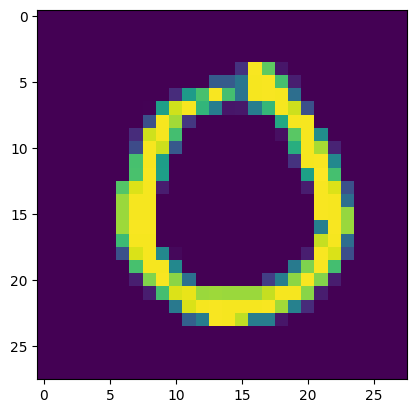

In [8]:
# (x_train,y_train) , (x_test,y_test) = keras.datasets.mnist.load_data()
# (x_train,x_test) = (x_train.astype("float32") / 255,x_test.astype("float32") / 255)
# x_train = np.expand_dims(x_train,-1)
# x_test = np.expand_dims(x_test,-1)
# print(len(x_train),len(x_test))
index = 546
plt.imshow(x_test[index])
test = np.expand_dims(x_test[index],0)
print(np.argmax(model.predict(test)))

In [9]:
model.save("model.keras")

In [93]:
y_test[5]

1

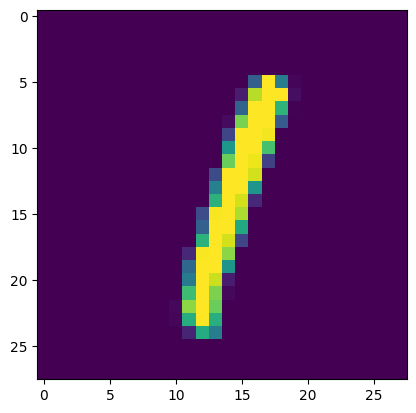